In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


df = pd.read_csv('./../data/curated/engineered-data.csv')

In [24]:
# file from victorian government website
gdf = gpd.read_file('./../data/raw/gda94_victoriagrid/esrishape/whole_of_dataset/victoria/VMADMIN/POSTCODE_POLYGON.shp') #noqa

In [25]:
gdf['postcode'] = gdf['POSTCODE'].astype(int)
gdf = gdf.drop('POSTCODE', axis=1)

df['postcode'] = df['postcode'].astype(int)

In [26]:
postcodeFreq = pd.DataFrame(df.groupby('postcode').mean())

In [27]:
postcodeFreq['zlogCrimerate']

postcode
3000    2.282536
3002    1.038875
3003    1.041145
3004    1.628681
3006    1.581340
          ...   
3765    0.415535
3767   -0.187339
3781    0.106394
3782    0.245658
3788   -0.240281
Name: zlogCrimerate, Length: 182, dtype: float64

In [28]:
gdf = gdf.merge(postcodeFreq, on='postcode')

In [29]:
gdf.head()

PFI      PFI_CR        UFI      UFI_CR    UFI_OLD  \
0  205410082  2005-09-27  468438225  2013-10-24  276949831   
1  205410234  2005-09-27  605058974  2021-02-23  576885034   
2  205409916  2005-09-27  559407772  2018-09-06  526596950   
3  205408458  2005-09-27  559407781  2018-09-06  553222661   
4  205409999  2005-09-27  468438318  2013-10-24  276949748   

                                            geometry  postcode       price  \
0  POLYGON ((2516619.521 2407776.903, 2516647.746...      3131  481.875000   
1  POLYGON ((2502460.400 2404045.989, 2502464.885...      3144  599.500000   
2  POLYGON ((2482698.987 2414835.543, 2482698.016...      3023  422.670103   
3  MULTIPOLYGON (((2451881.655 2403637.673, 24518...      3030  427.438596   
4  POLYGON ((2508540.711 2395184.722, 2508429.465...      3167  498.500000   

   bedrooms  bathrooms  ...  closest_secondary_distance  \
0  2.916667   1.416667  ...                 2187.175000   
1  2.150000   1.250000  ...                 2047.960000   
2  3.041237   1.649485  ...                 2462.002062   
3  3.473684   1.870175  ...                 2379.527018   
4  2.800000   1.400000  ...                 2092.580000   

   closest_train_distance  closest_tram_distance  cbd_distance  cbd_duration  \
0             1959.858333            3908.716667  24929.104167   1646.979167   
1              953.705000             334.055000  11313.520000   1056.820000   
2             6253.255670           14740.380412  28699.176289   1883.460825   
3             5101.929474           26547.898246  31930.963158   2011.317895   
4             1763.395000            6669.460000  21640.640000   1724.180000   

   zlogCrimerate  closest_bus_distance  closest_park_distance  min_pri_icsea  \
0       1.025035            450.533333            4713.337500    1118.041667   
1       0.762498            857.470000            6204.855000    1158.000000   
2       1.662226            635.922680            3404.861856    1009.041237   
3       1.910250            713.819649            5633.585614    1029.849123   
4       0.647010            465.875000            4397.590000    1029.450000   

   min_sec_icsea  
0    1058.416667  
1    1022.200000  
2     983.276923  
3     983.098361  
4    1033.000000  

[5 rows x 23 columns]

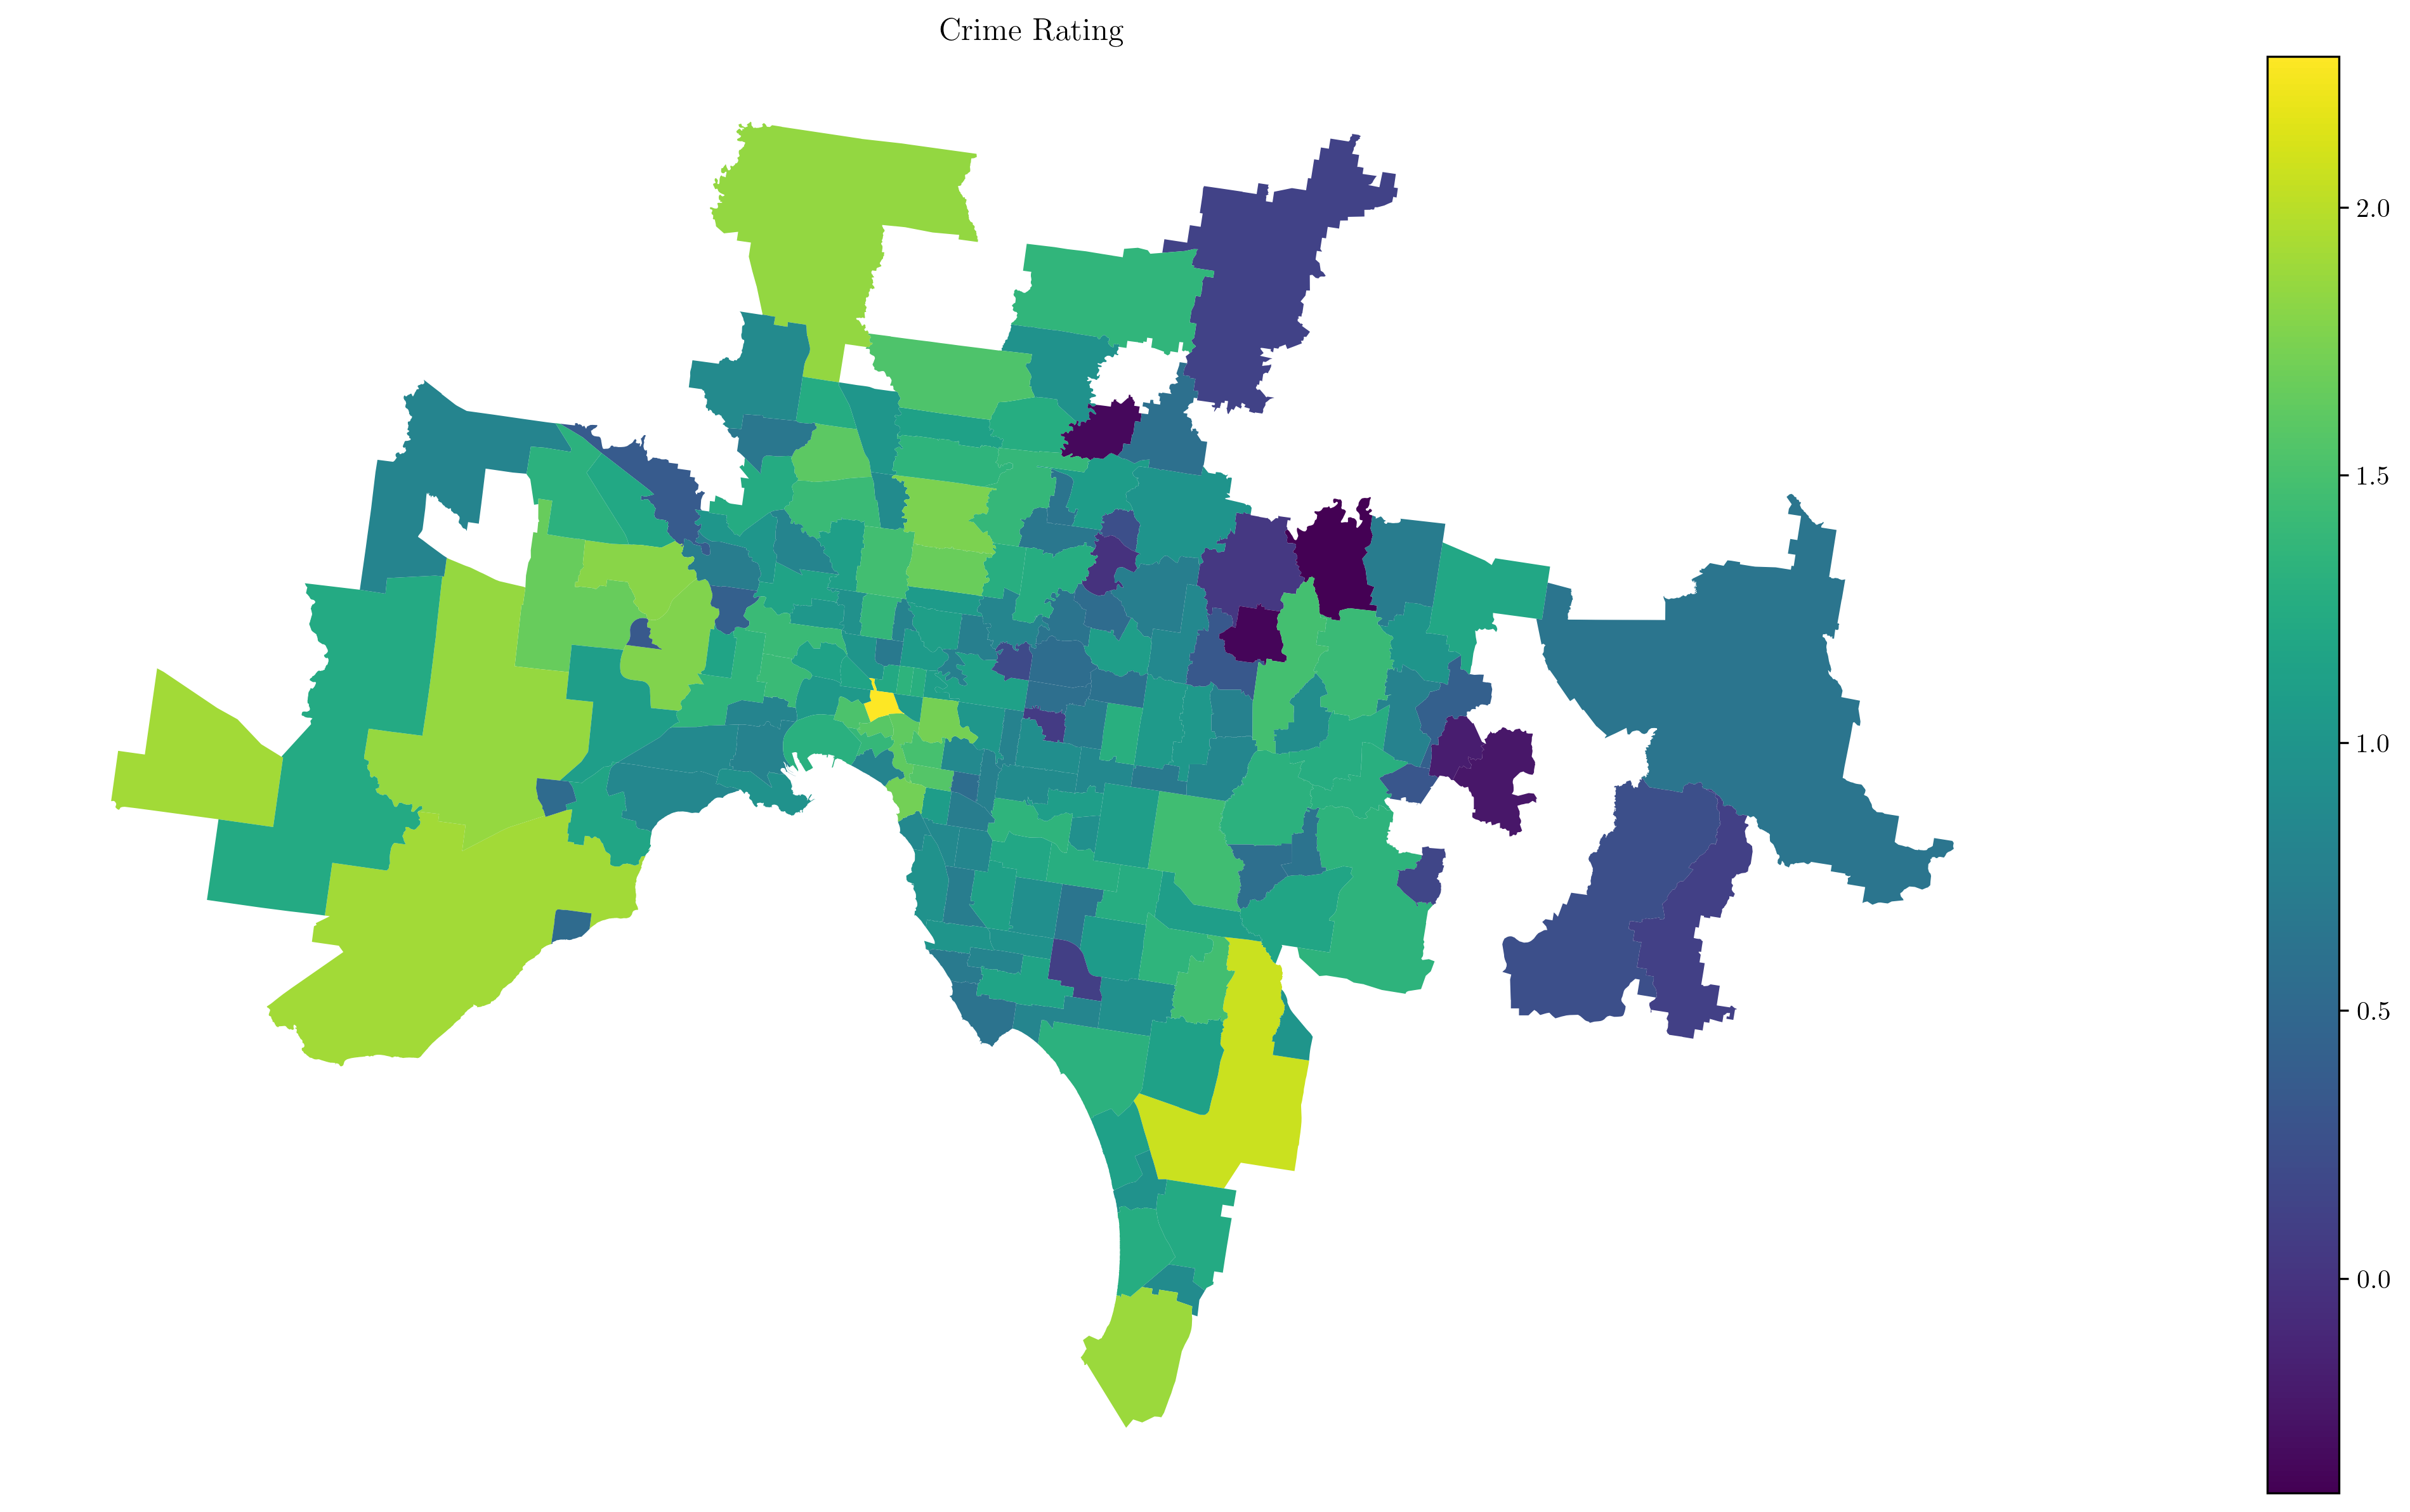

In [30]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("zlogCrimerate", legend=True, ax=ax)
plt.title('Crime Rating')
ax.set_axis_off()

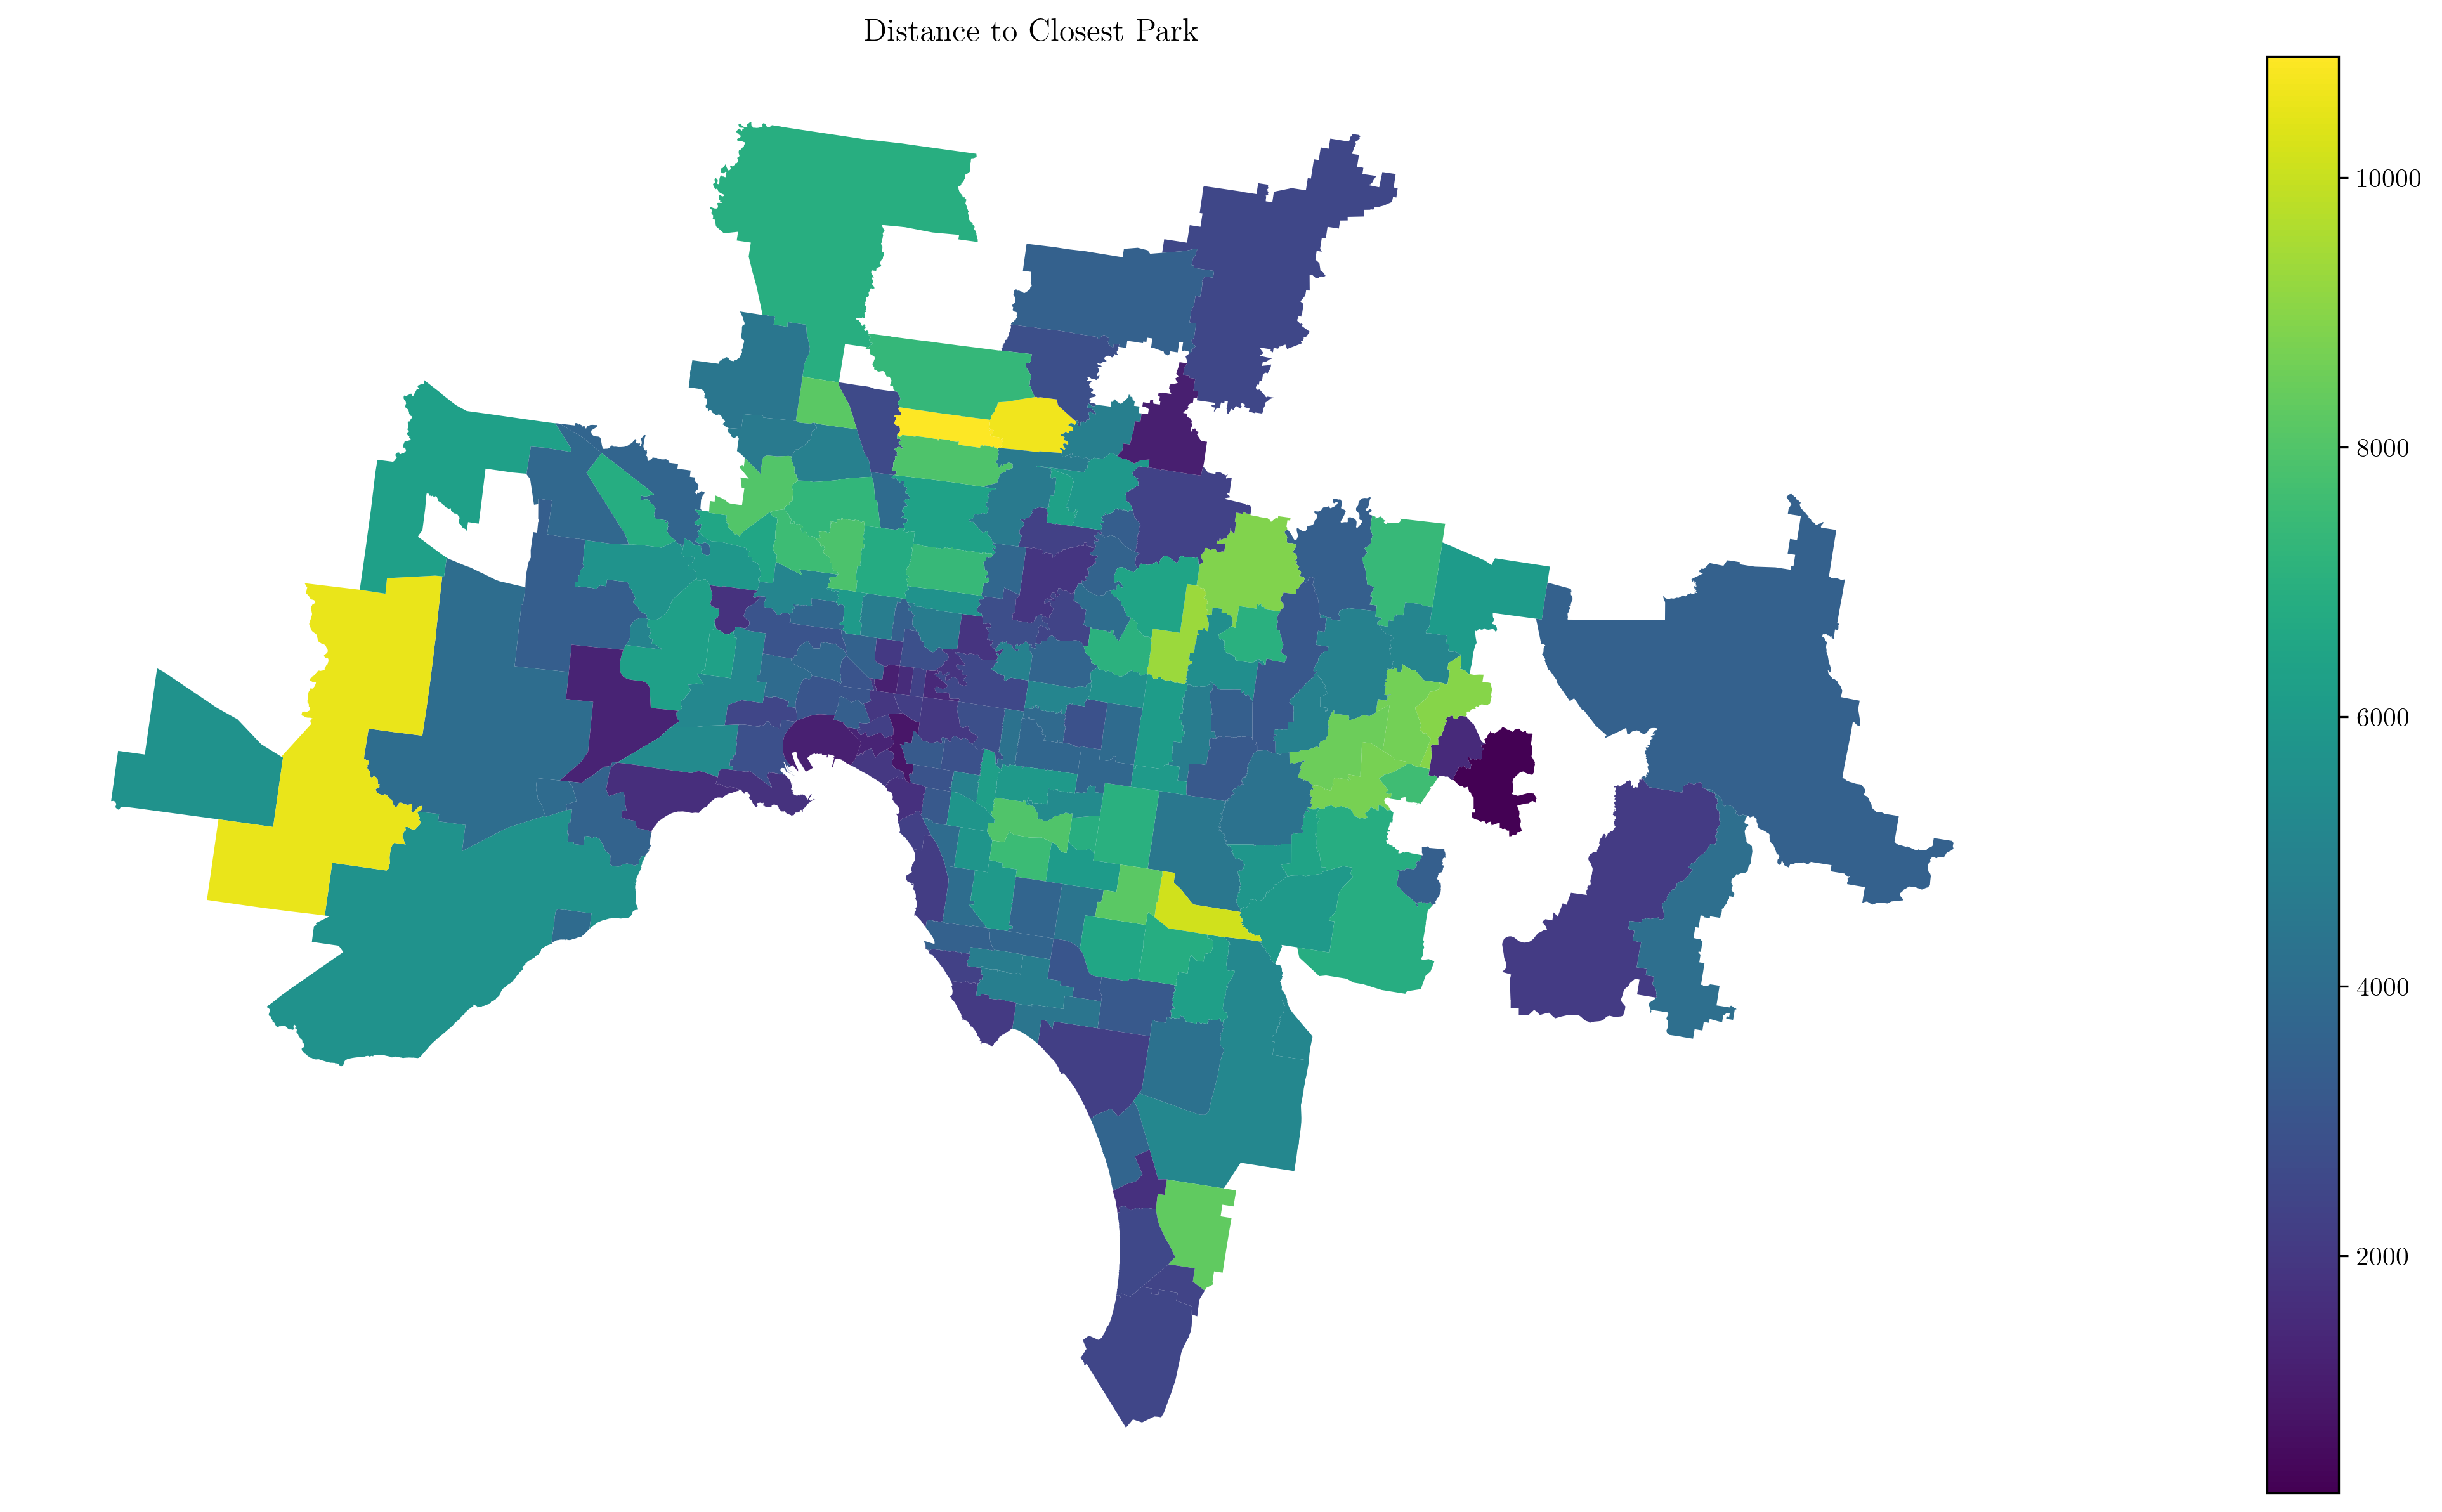

In [31]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("closest_park_distance", legend=True, ax=ax)
plt.title('Distance to Closest Park')
ax.set_axis_off()

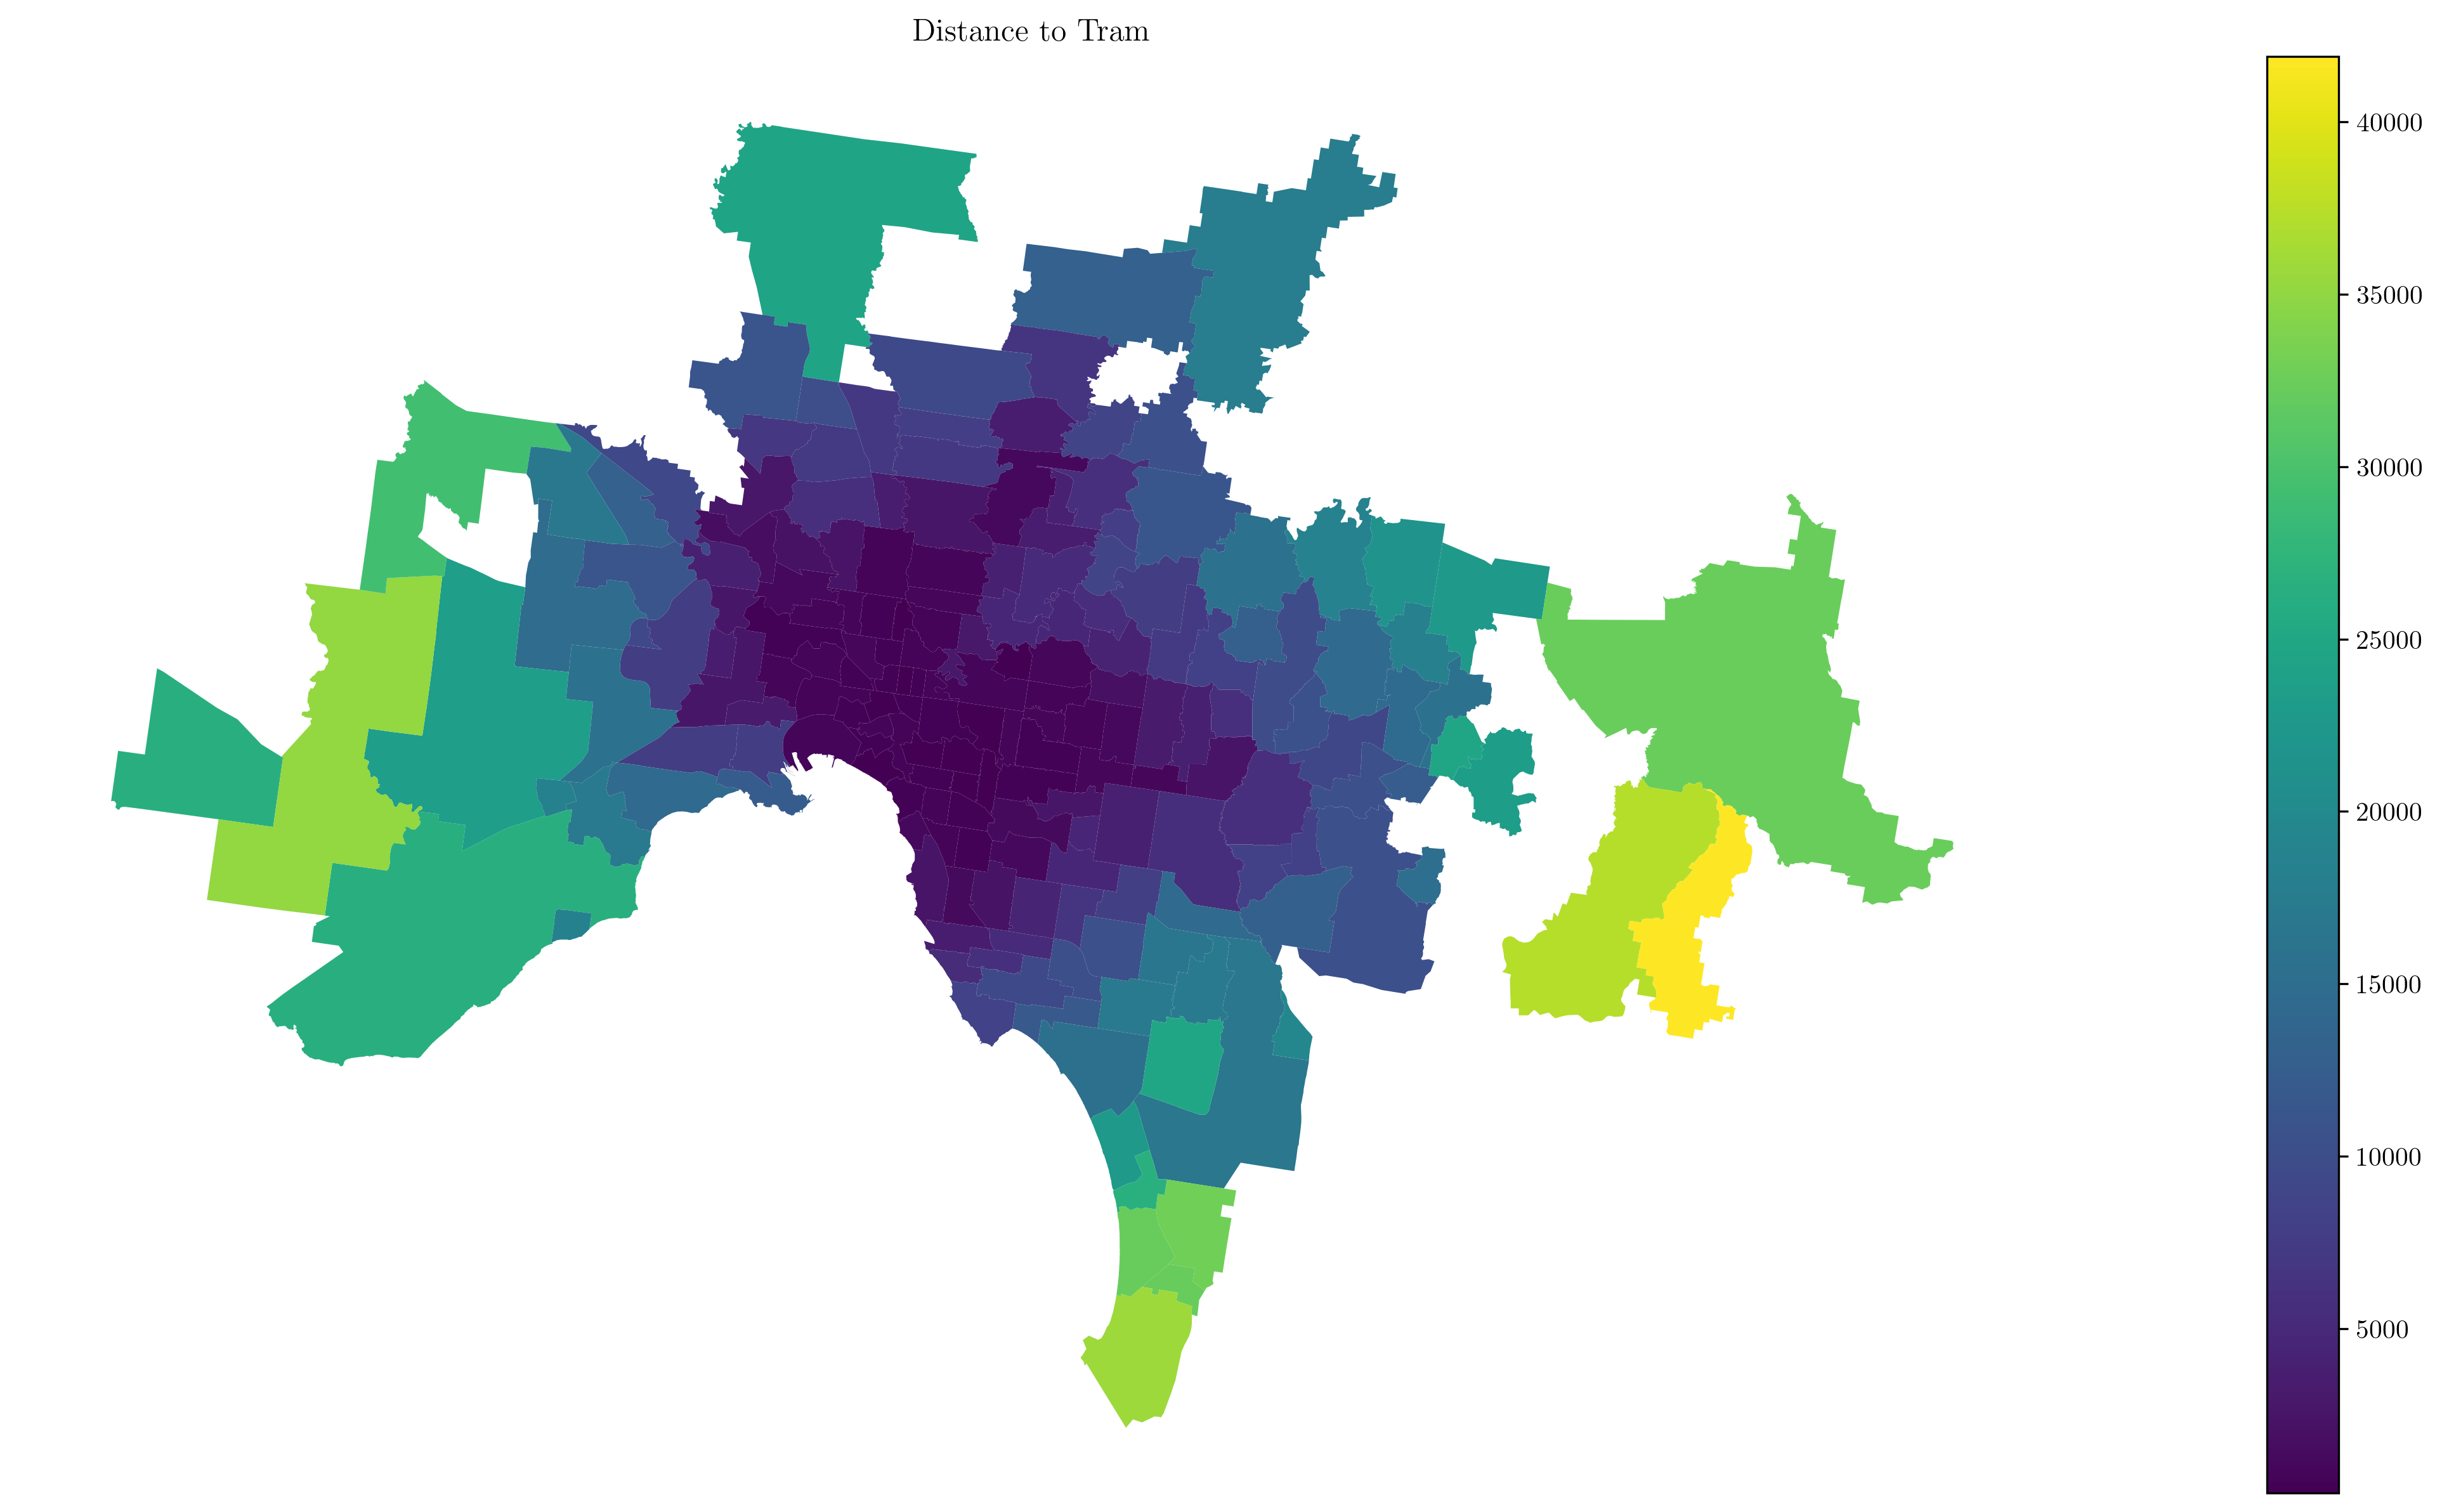

In [32]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("closest_tram_distance", legend=True, ax=ax)
plt.title('Distance to Tram')
ax.set_axis_off()

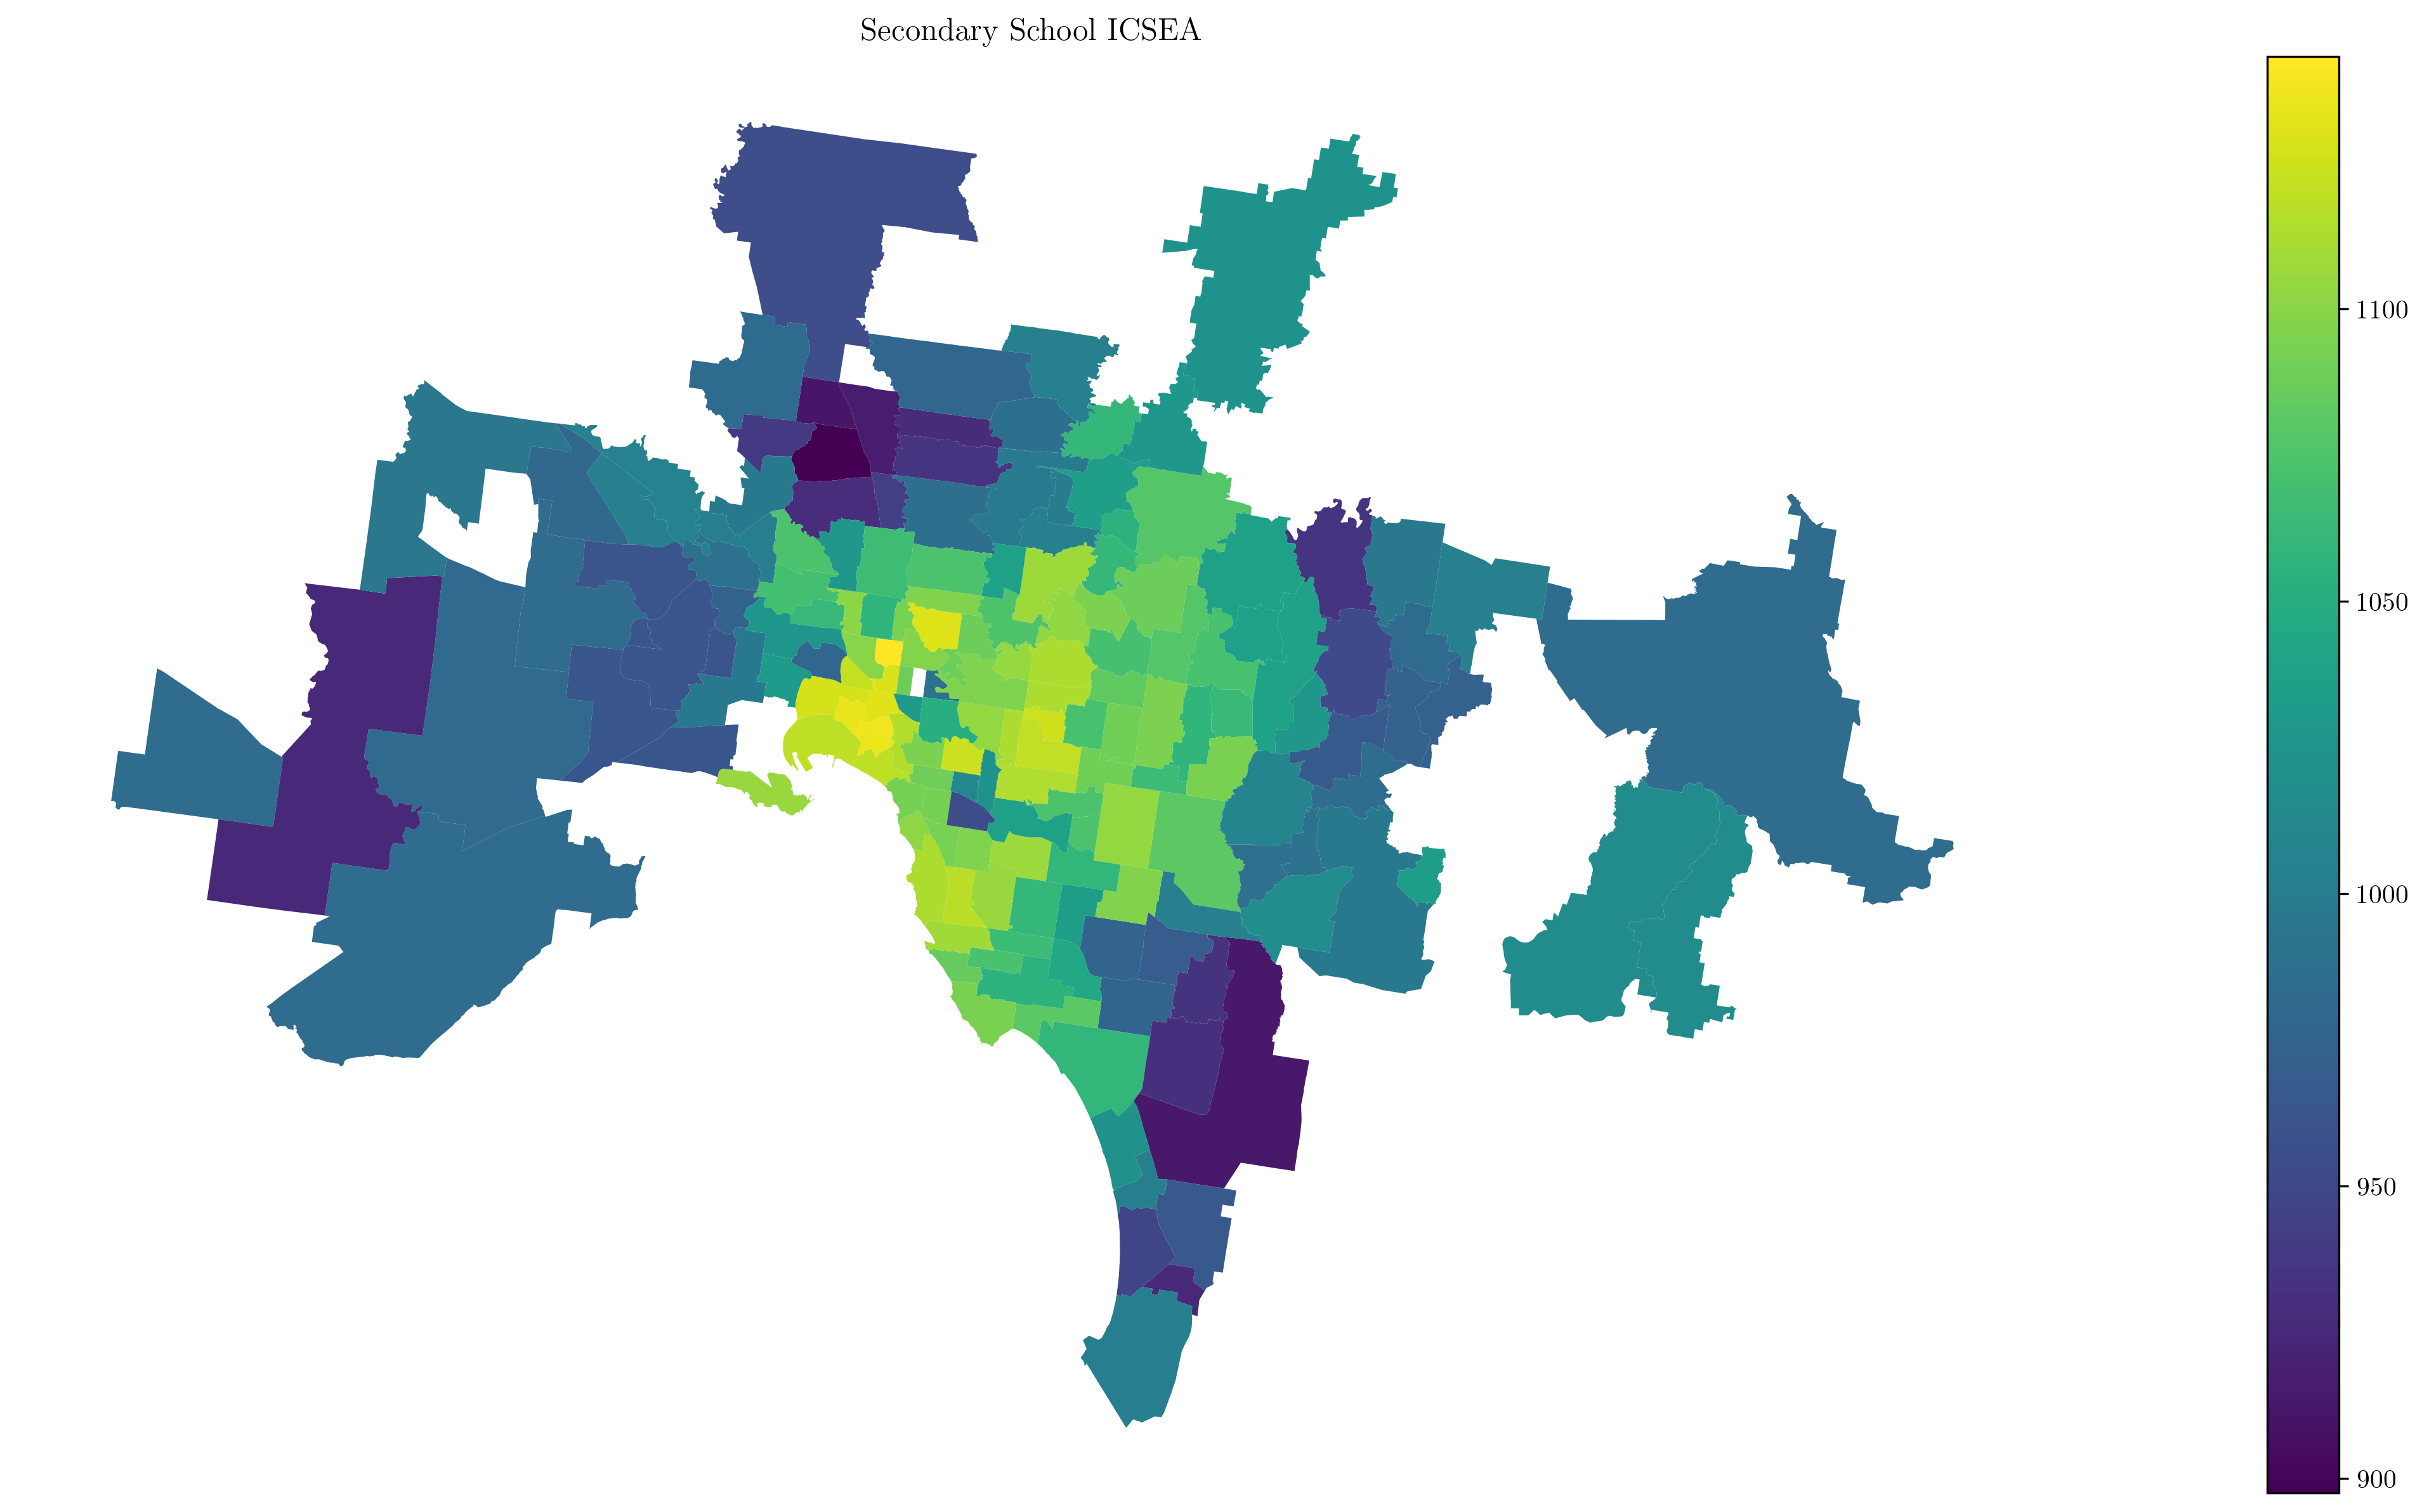

In [33]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("min_sec_icsea", legend=True, ax=ax)
plt.title('Secondary School ICSEA')
ax.set_axis_off()

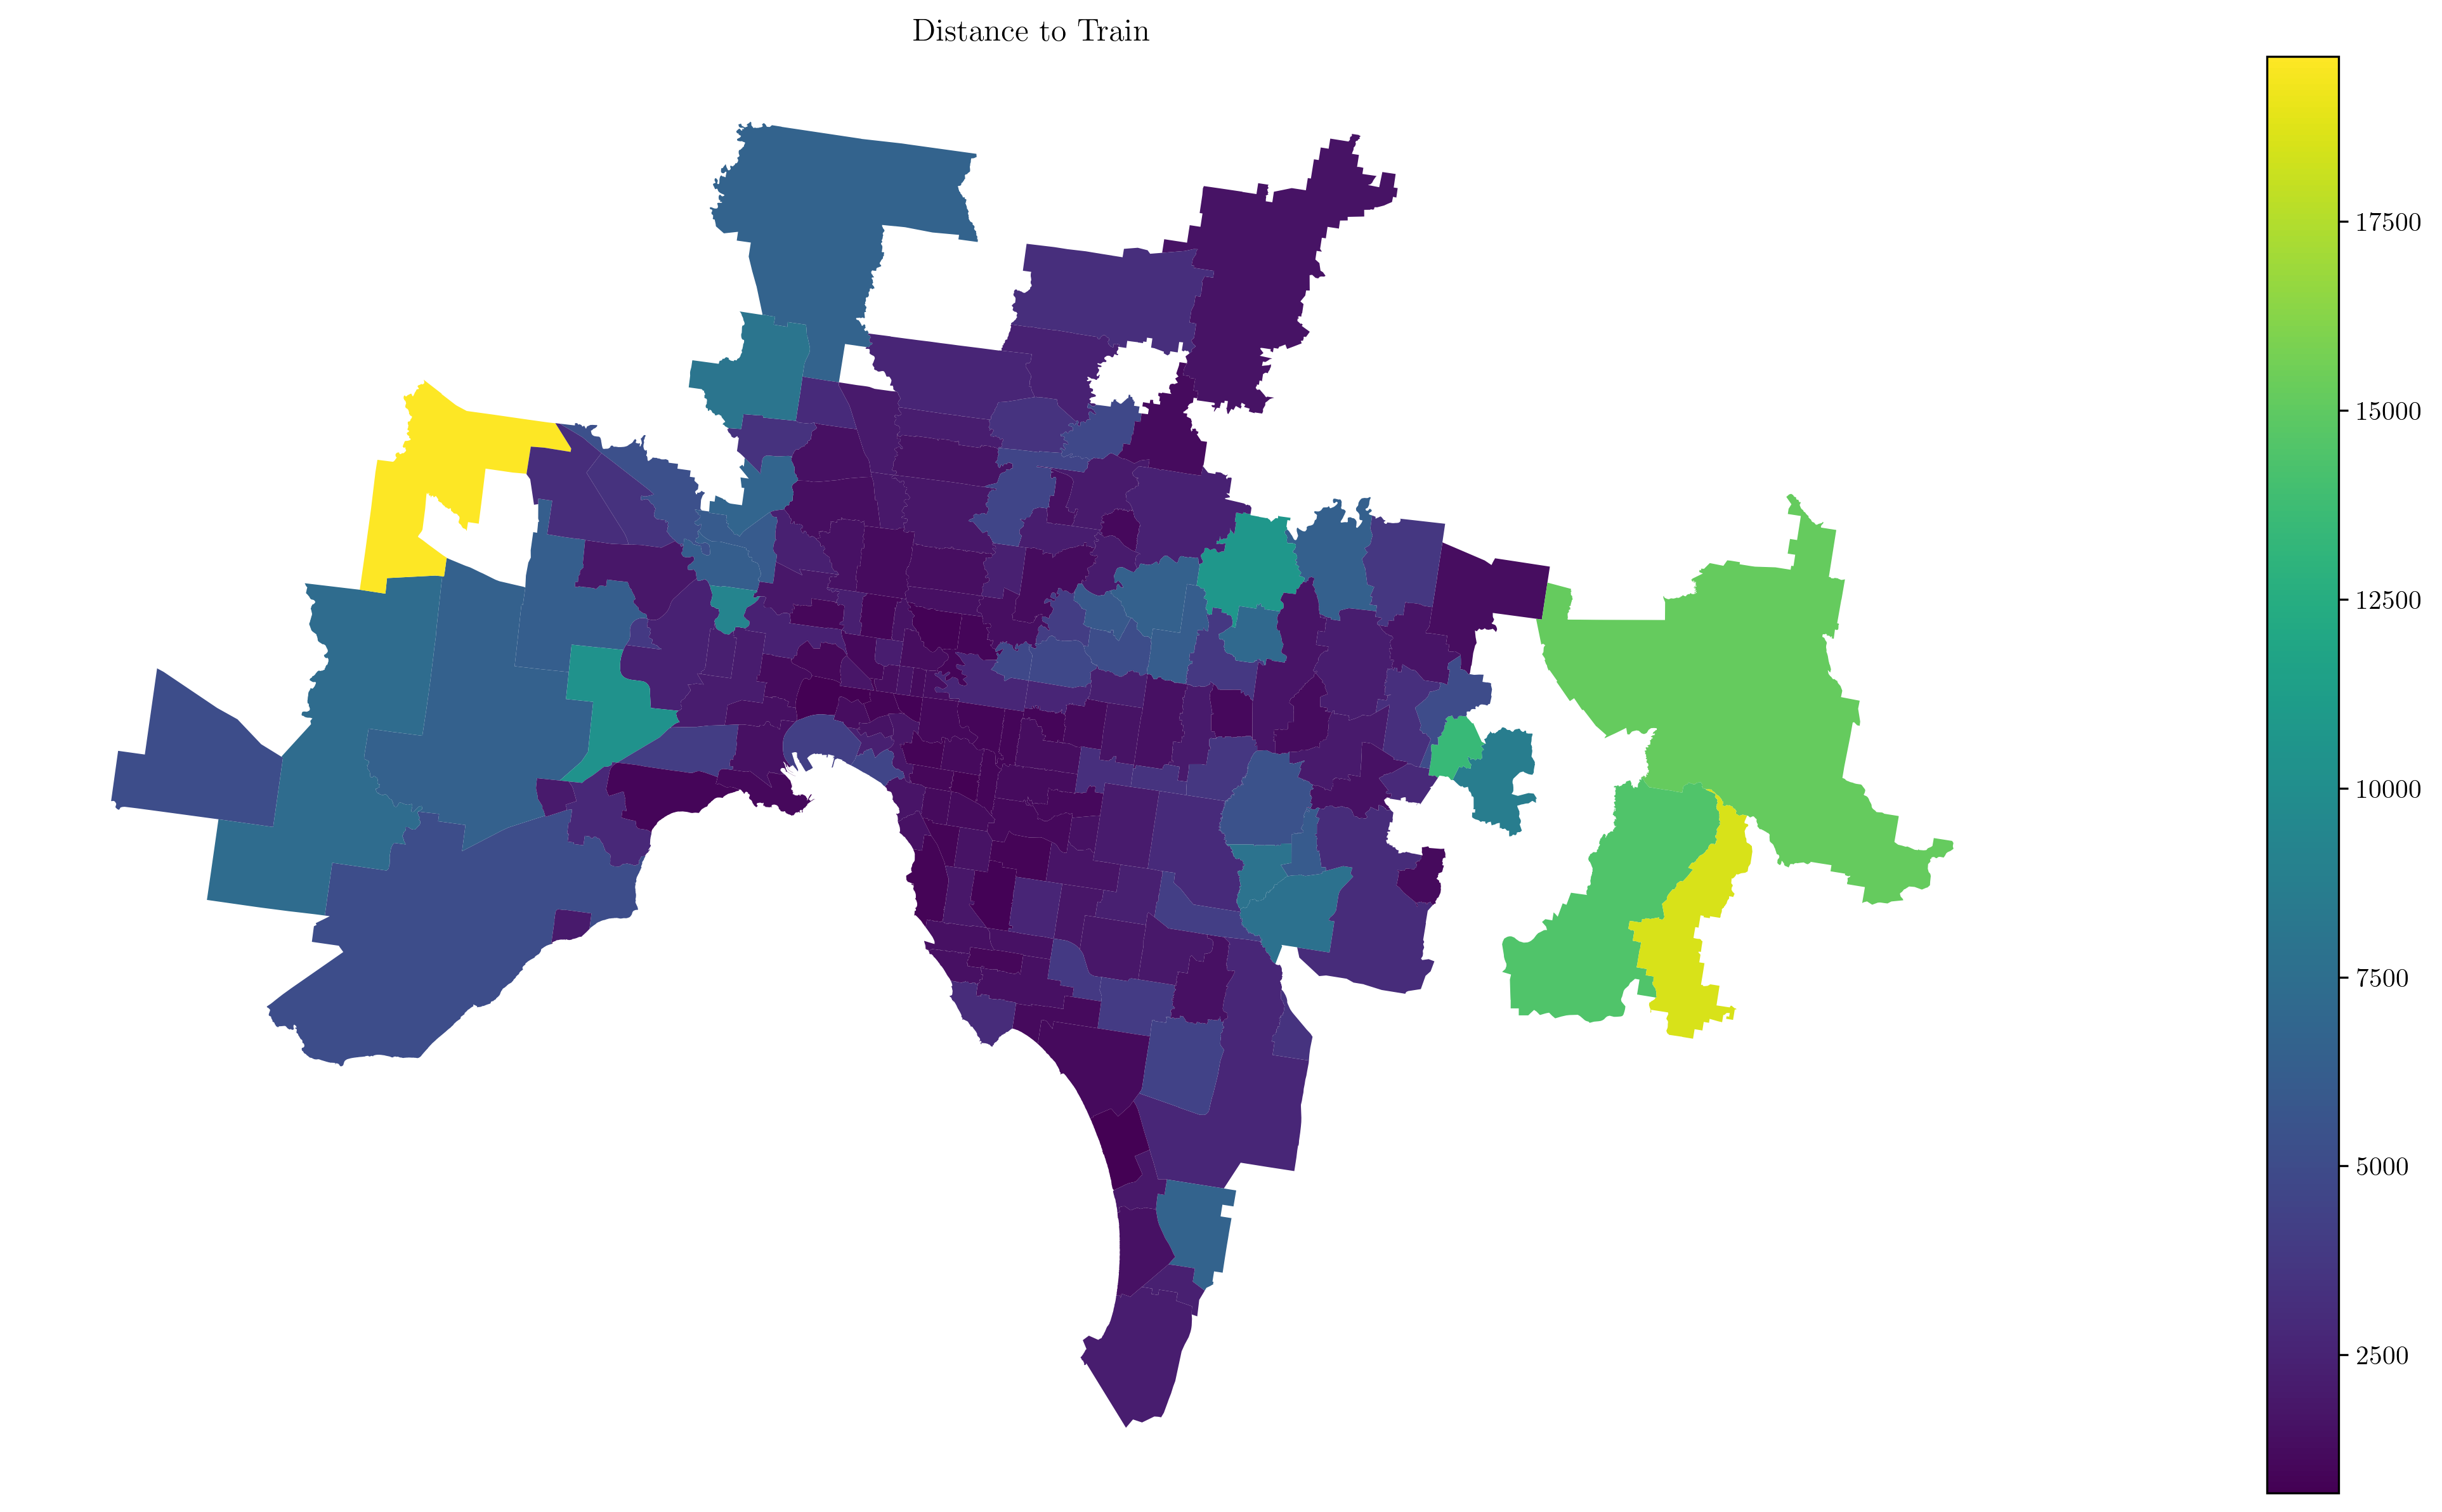

In [34]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("closest_train_distance", legend=True, ax=ax)
plt.title('Distance to Train')
ax.set_axis_off()

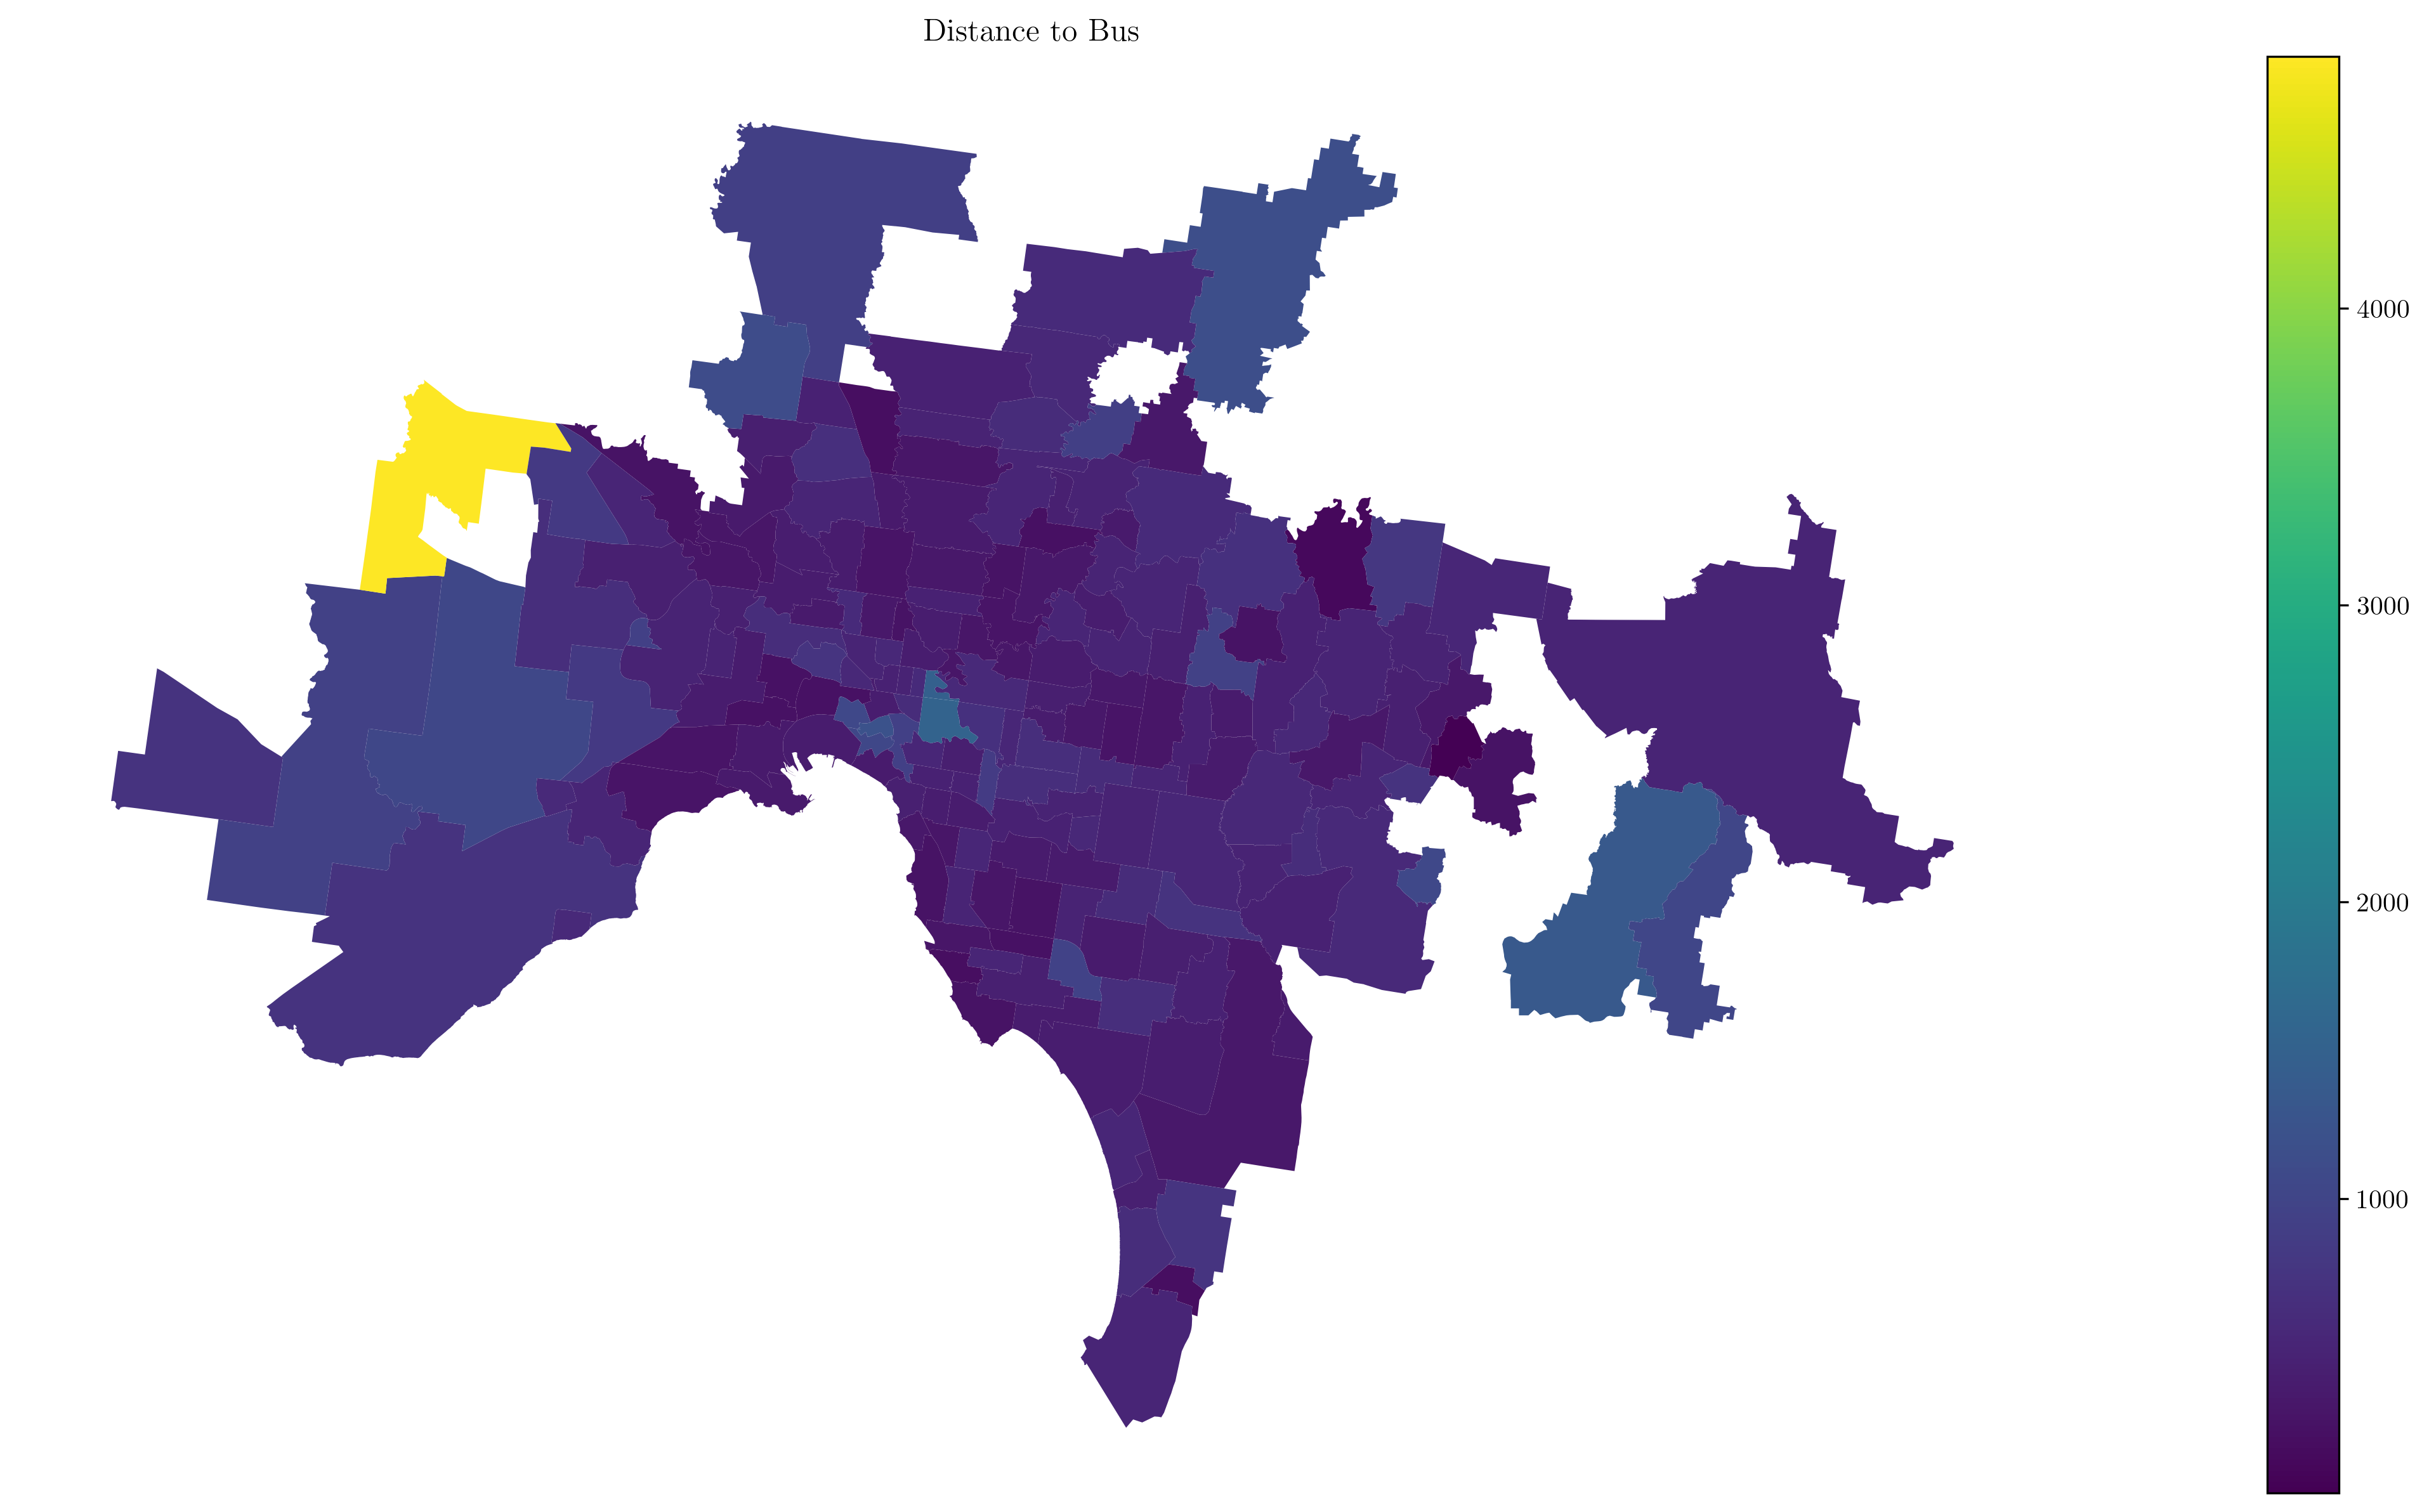

In [35]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("closest_bus_distance", legend=True, ax=ax)
plt.title('Distance to Bus')
ax.set_axis_off()

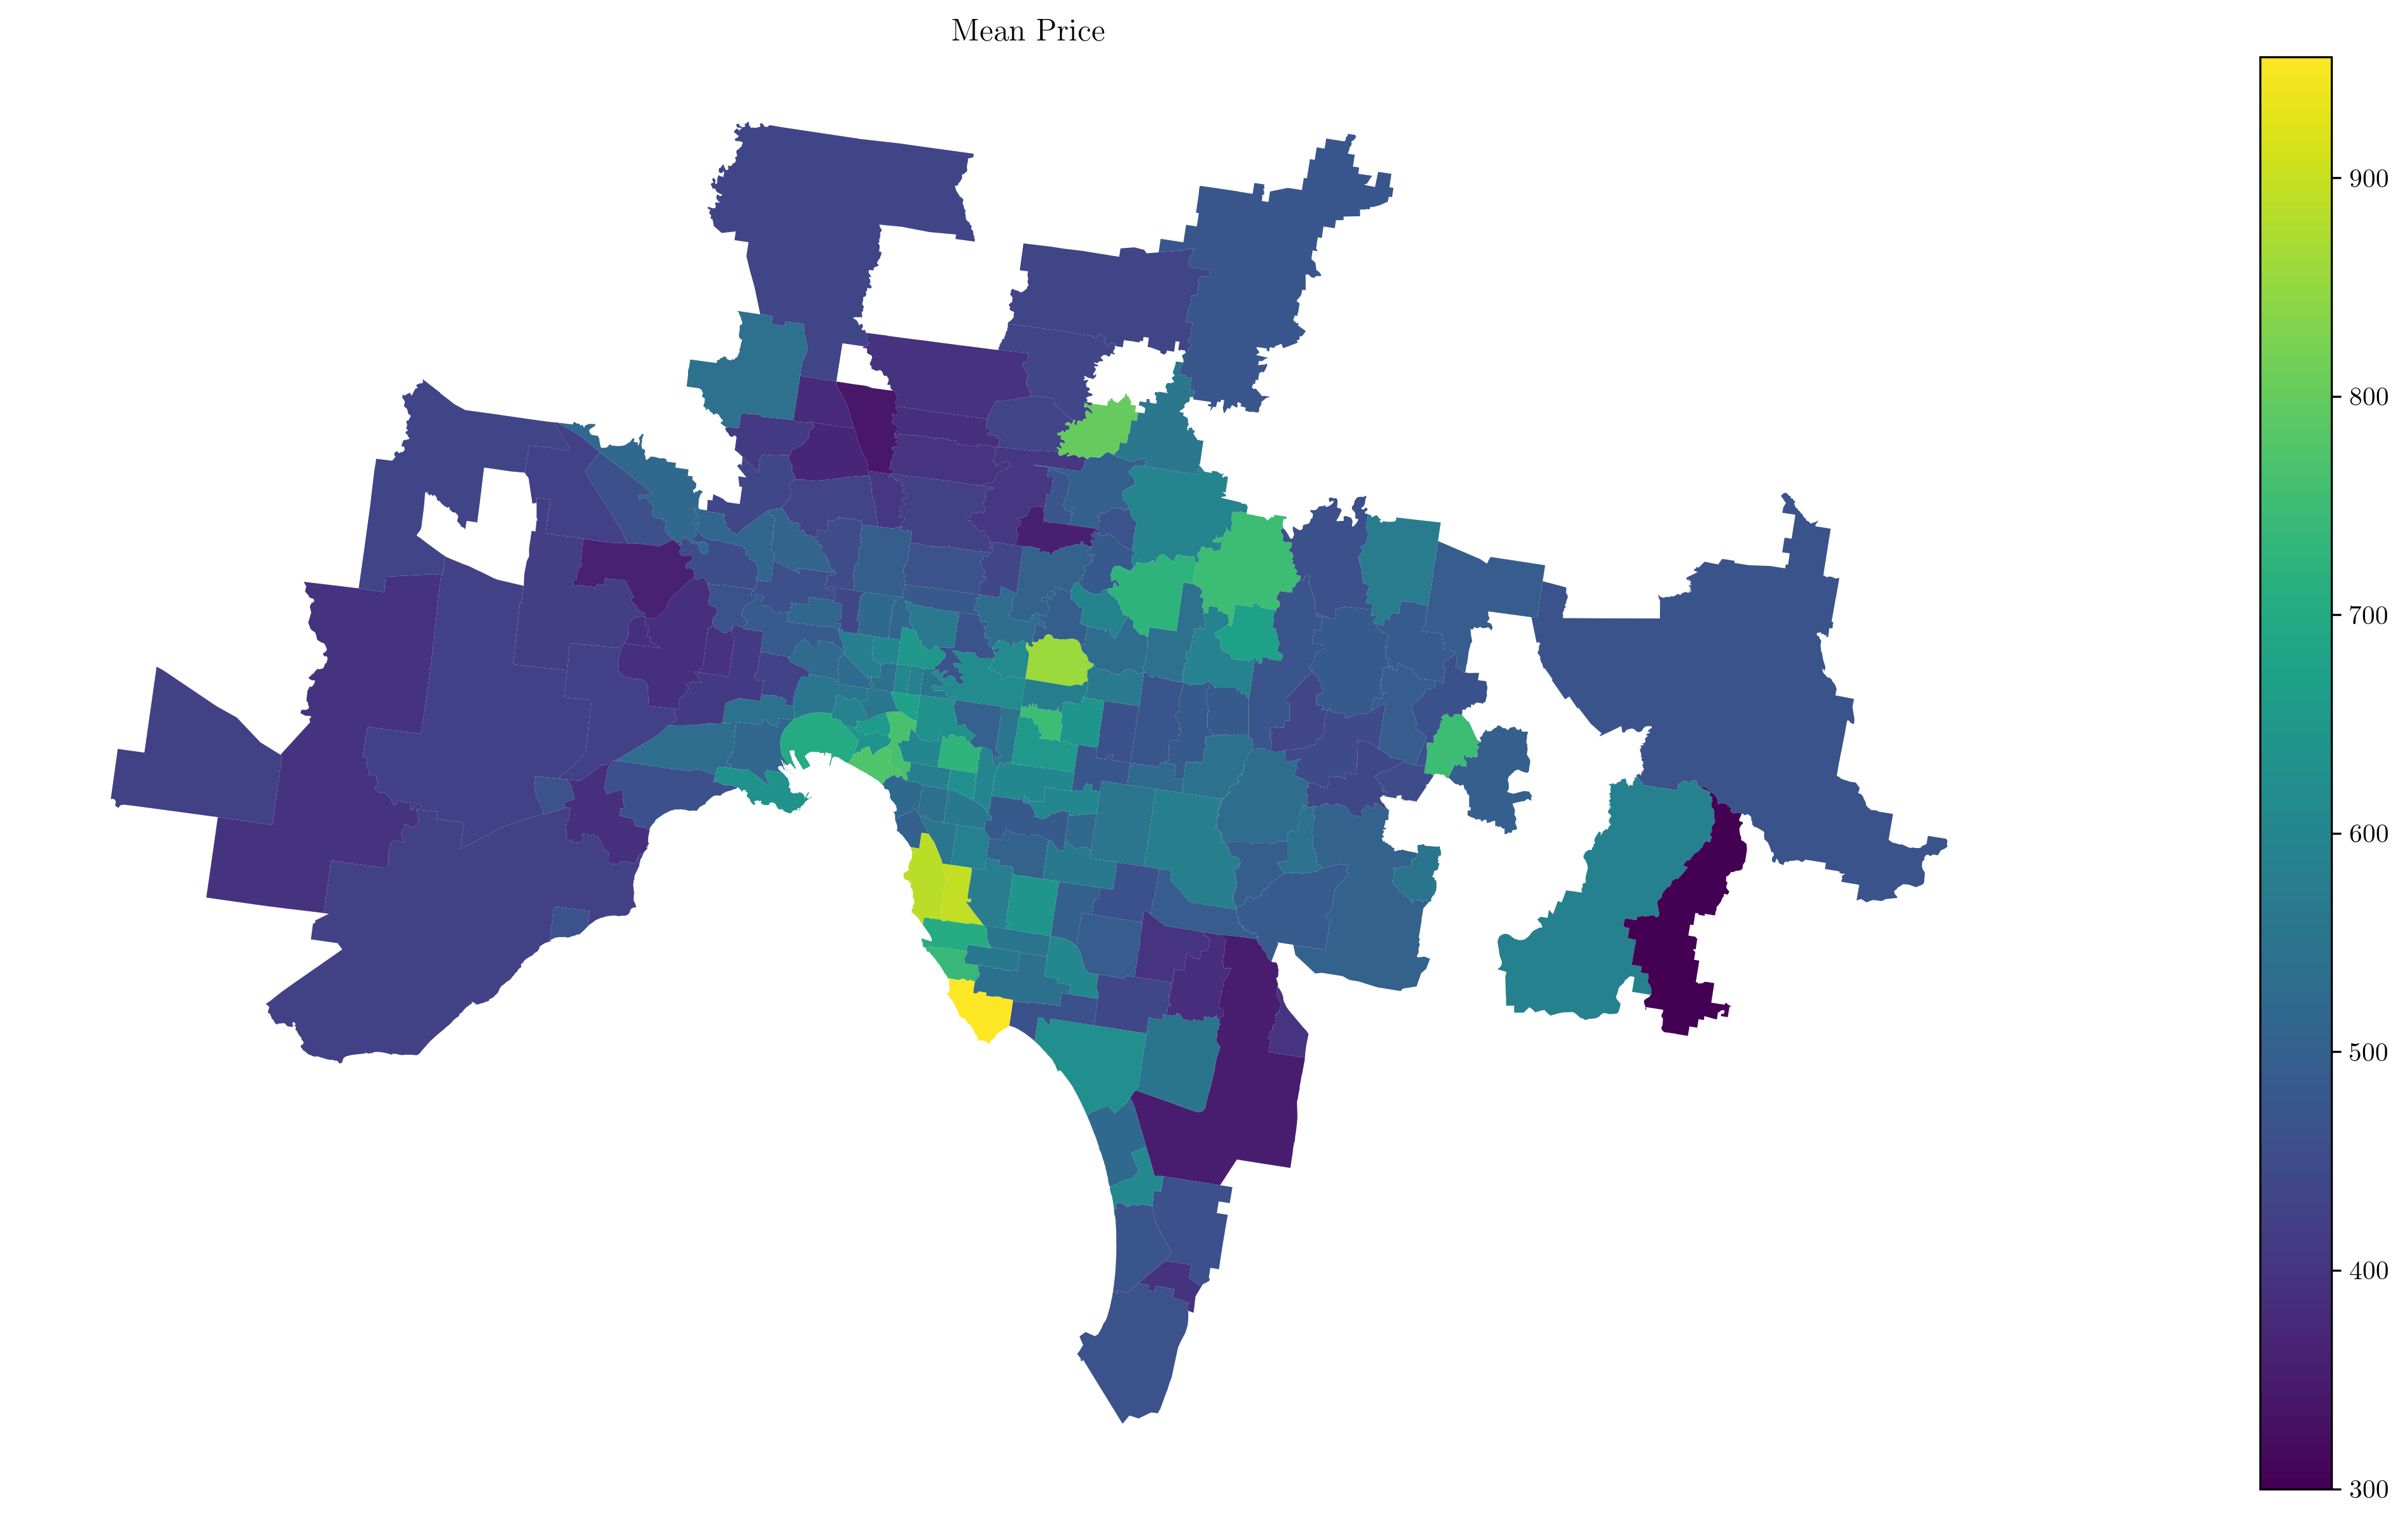

In [36]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("price", legend=True, ax=ax)
plt.title('Mean Price')
ax.set_axis_off()

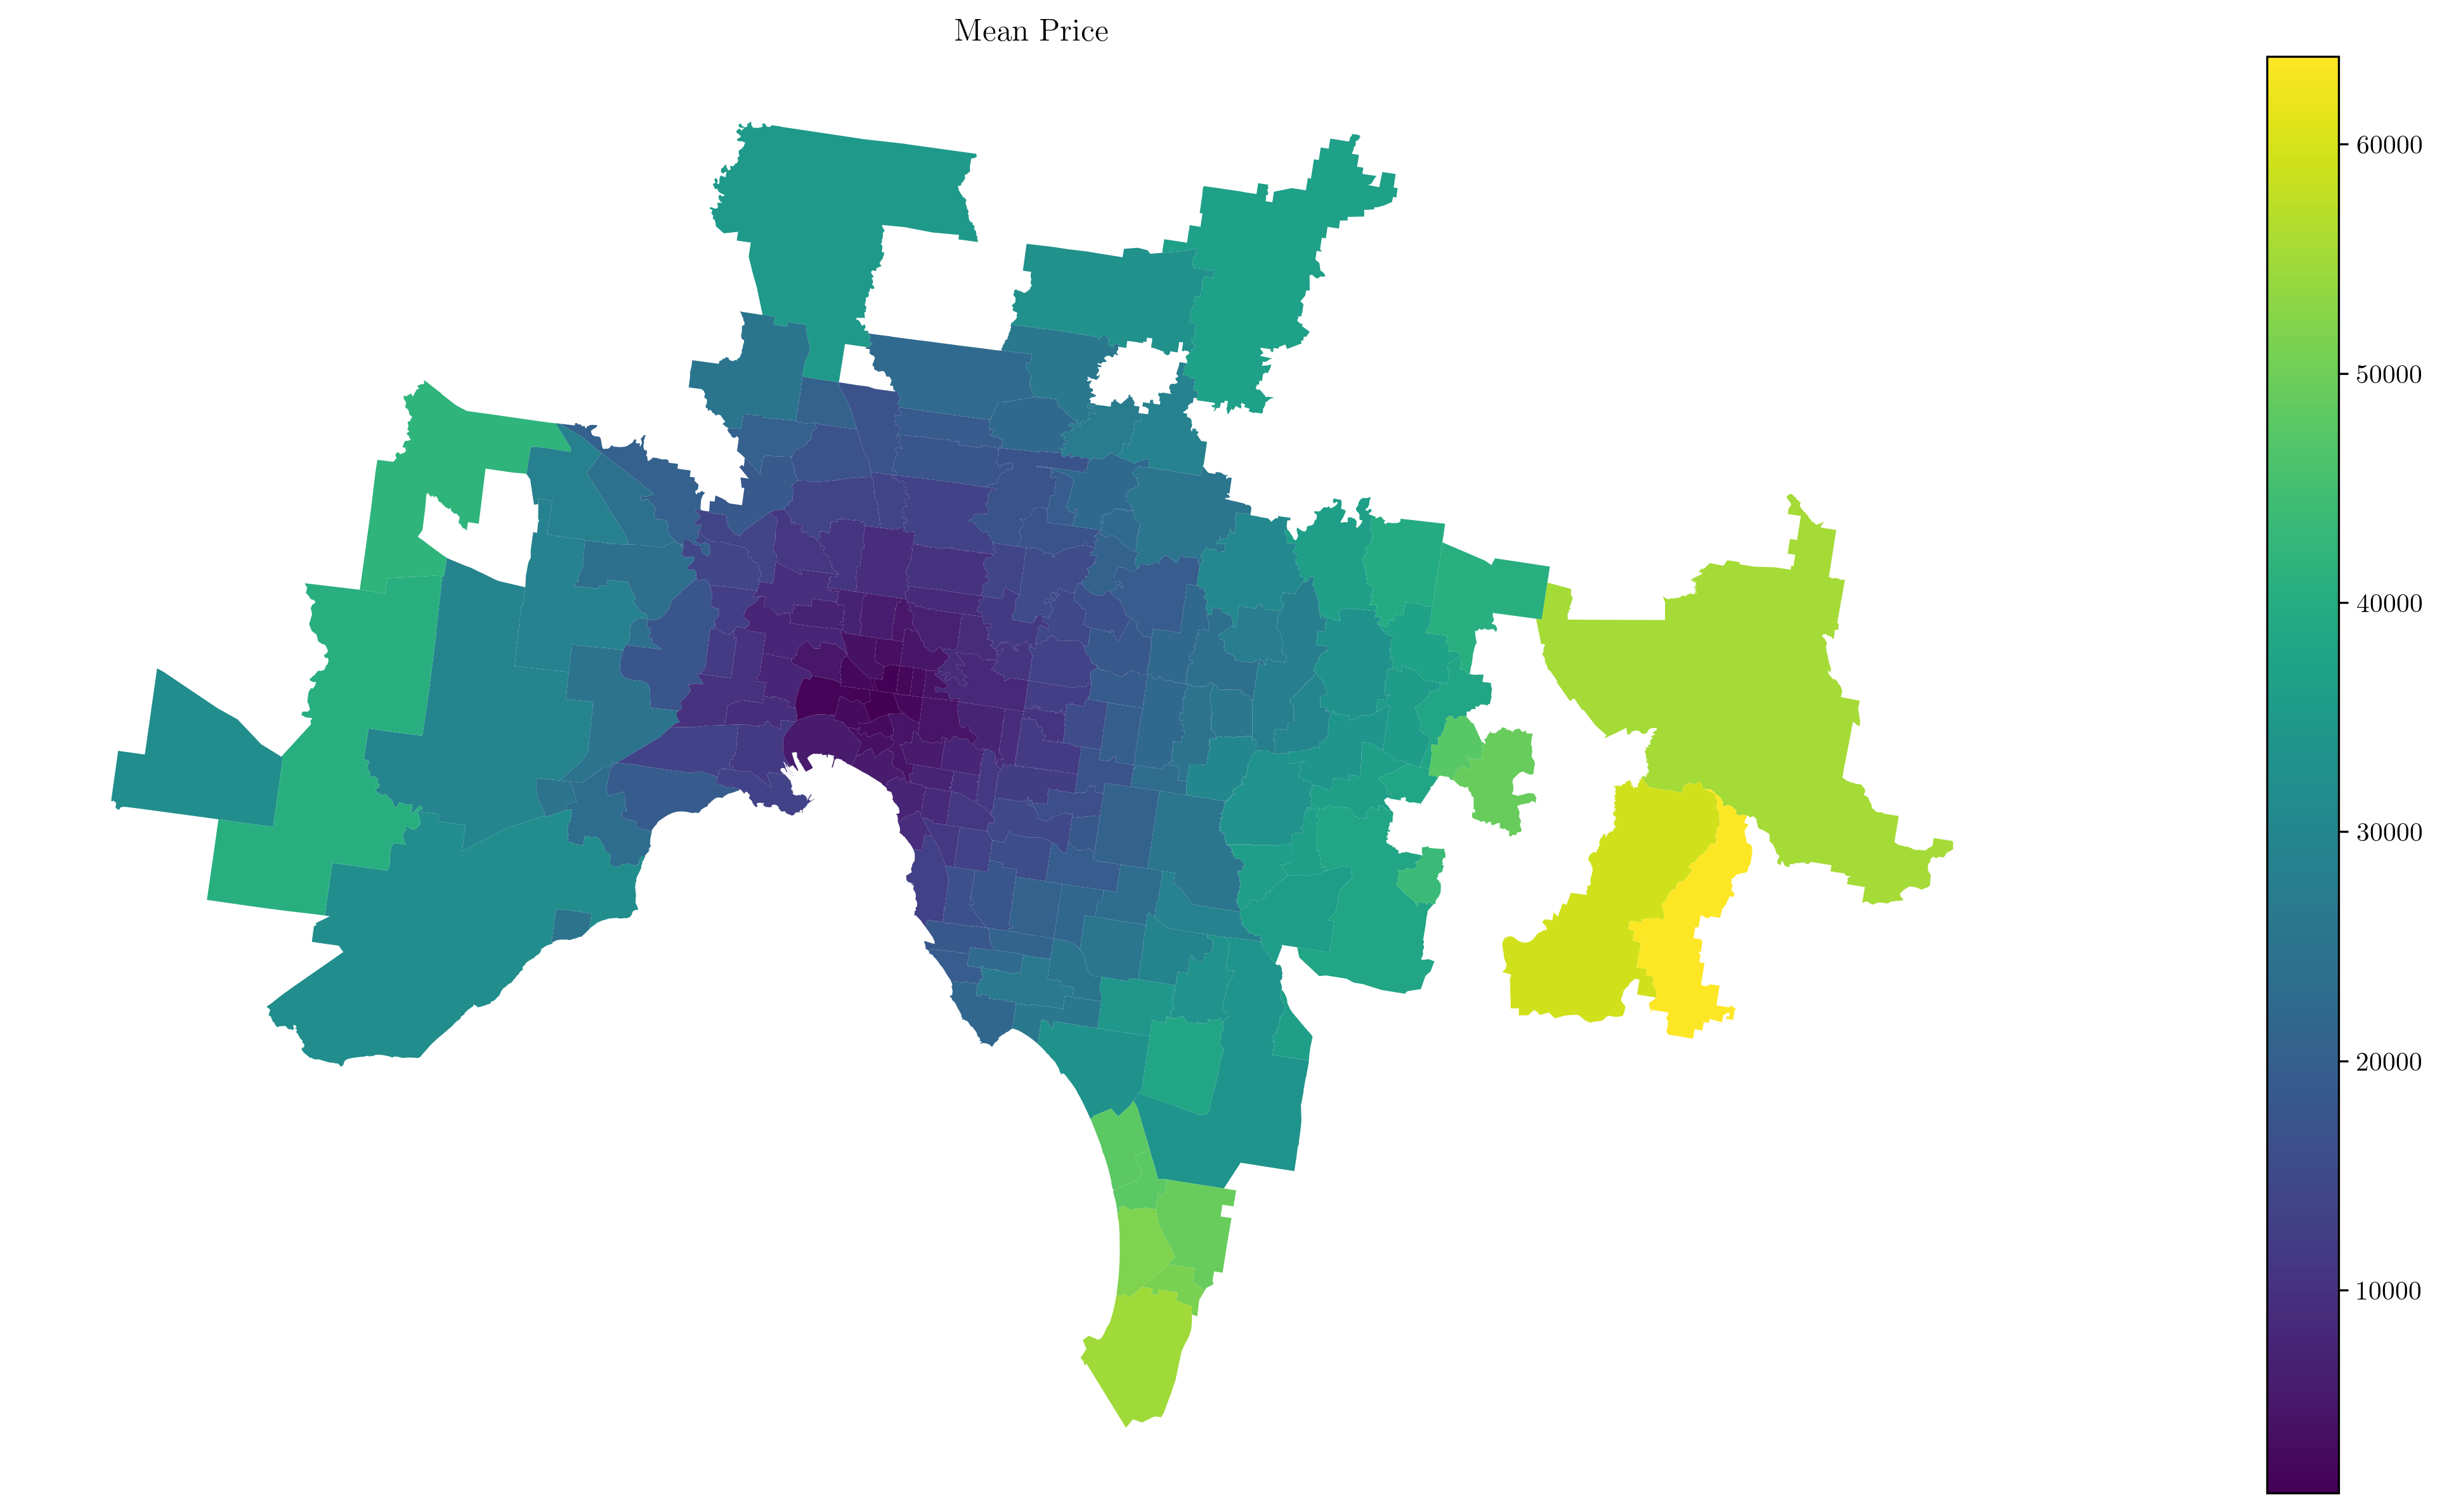

In [37]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("cbd_distance", legend=True, ax=ax)
plt.title('Distance to CBD')
ax.set_axis_off()

In [38]:
plt.savefig('../plots/listing-count.png')

<Figure size 432x288 with 0 Axes>